In [1]:
import numpy as np              
import matplotlib.pyplot as plt

from auto_training import auto_train    ## Here auto_train is who builds the parameters of the models

from feed_forward import feedfoward_NN  ## feedfoward_NN do the feedforward of the NN 
                                        ##        with the already defined parameters

from utils import make_gif    #We importa a function to make a gif from images
from utils import gen_data    #We importa a function to make a gif from images

# Example 1 

In this example we consider data that is randombly generated (uniform (0,1)). We show the function auto_train is able to contruct the neural network parameters without any training process.

We start defined some parameters 

In [2]:
example = "example_1"                     # We give a name to this example (to save the images)
colors = np.array(['#B3001E', '#1E599C']) # We define 2 colors

Now, we generate the data using the funtion `gen_data` from the module utils, and plot it

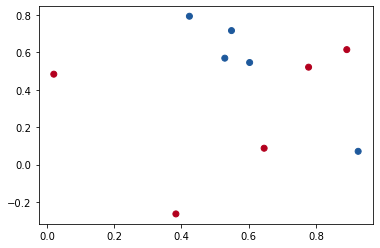

In [3]:
X,Y =  gen_data(5,-0.35)
plt.scatter(X[:,0],X[:,1],c=colors[Y])

Then, we use the function `auto_train` to construct the parameters of the neural network (NN). Moreover, we activate the parameter `plot=True` to plot the position of the data on each layer, and the parameters (understood as hyperplanes) of the NN on that layer.

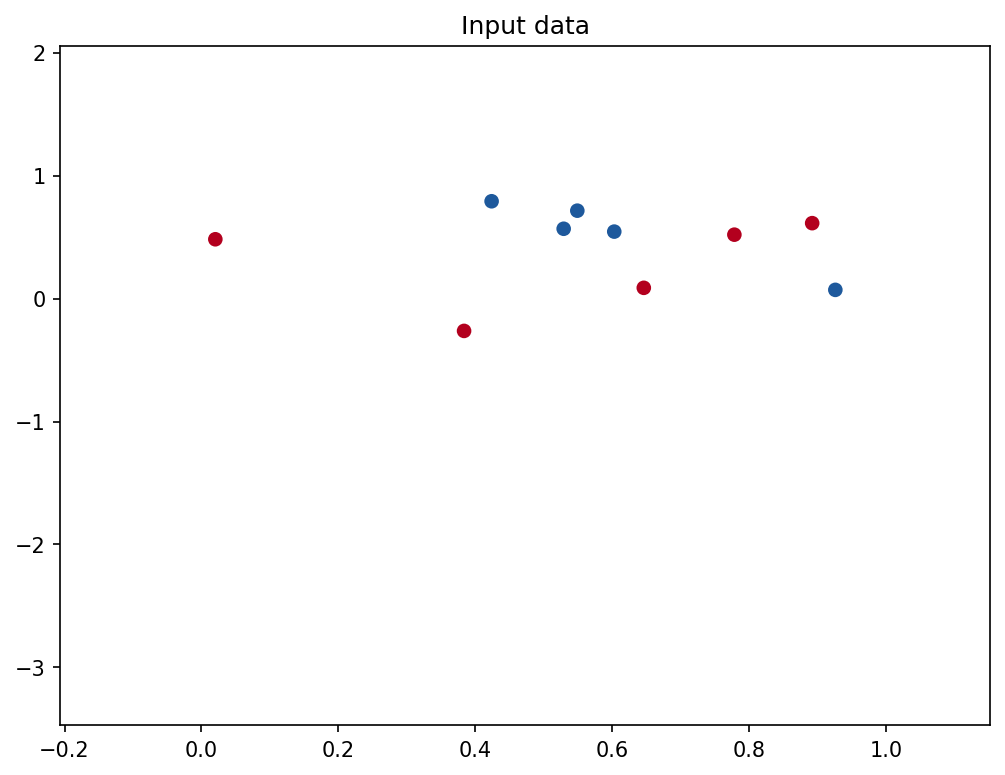

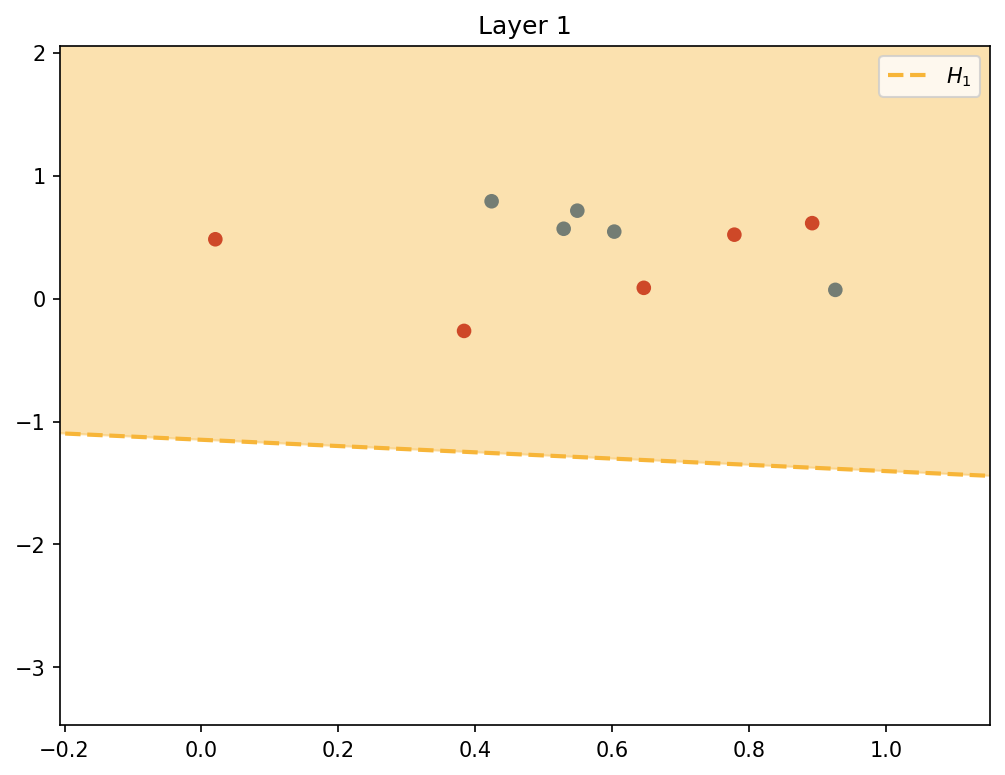

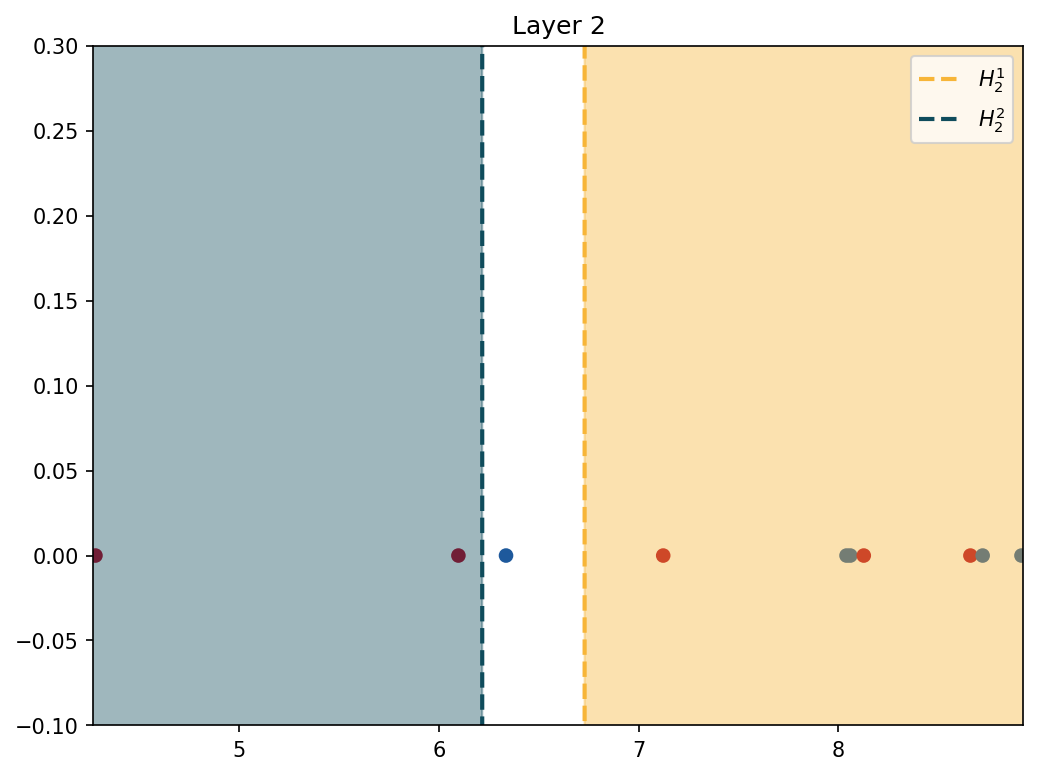

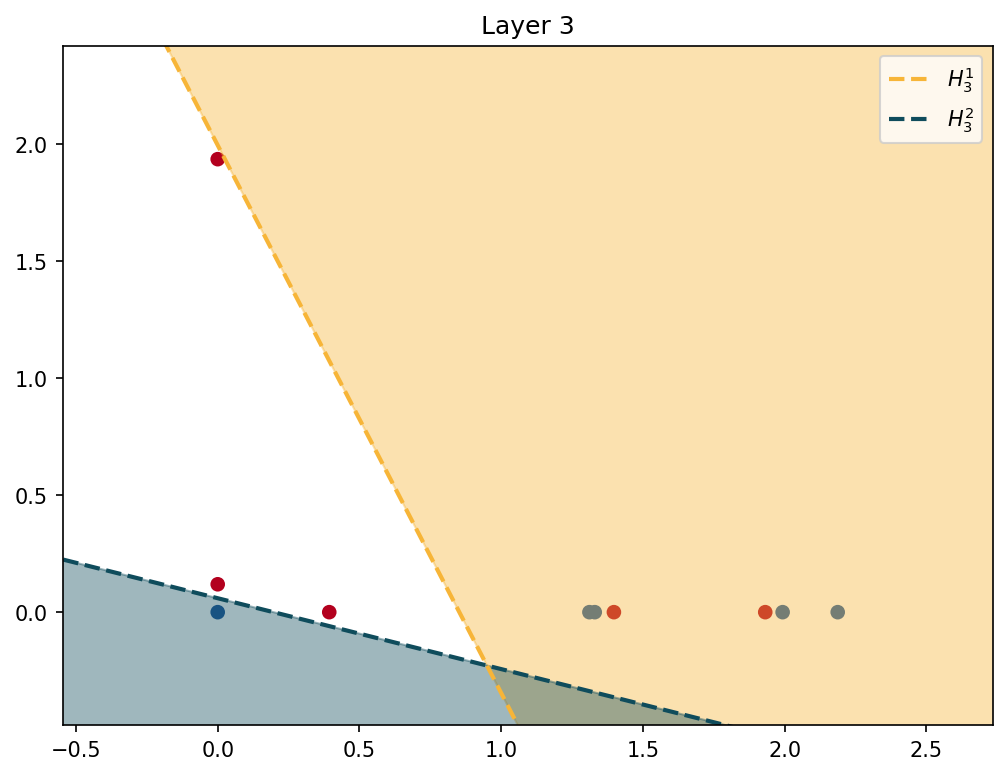

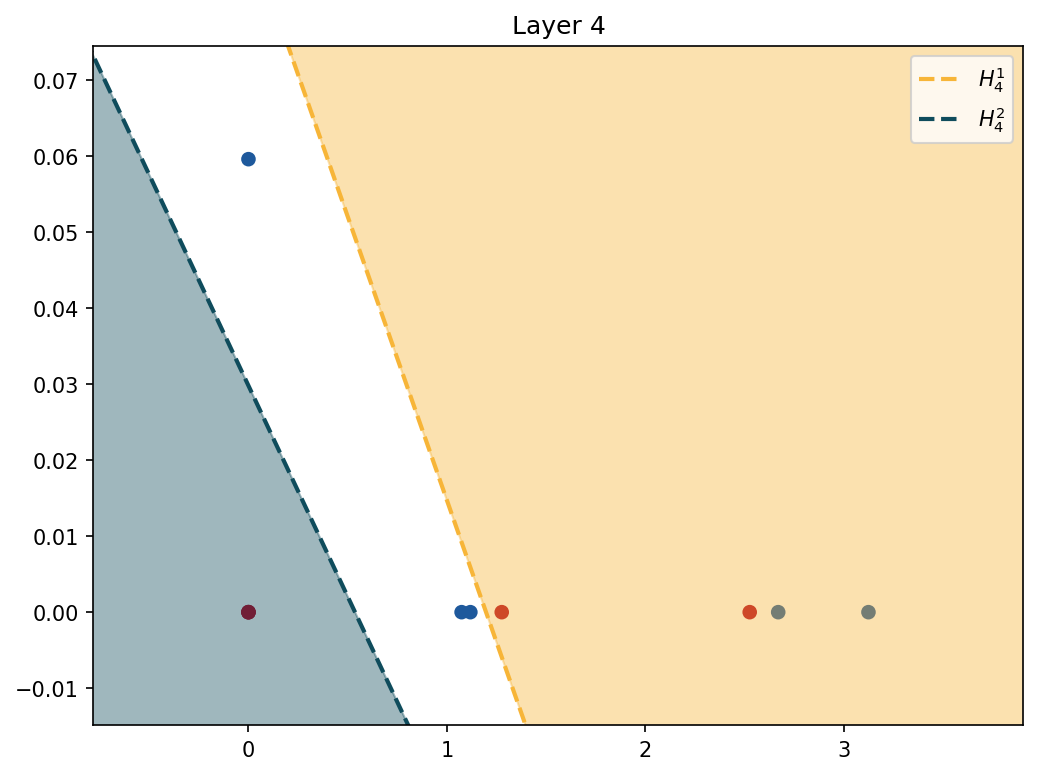

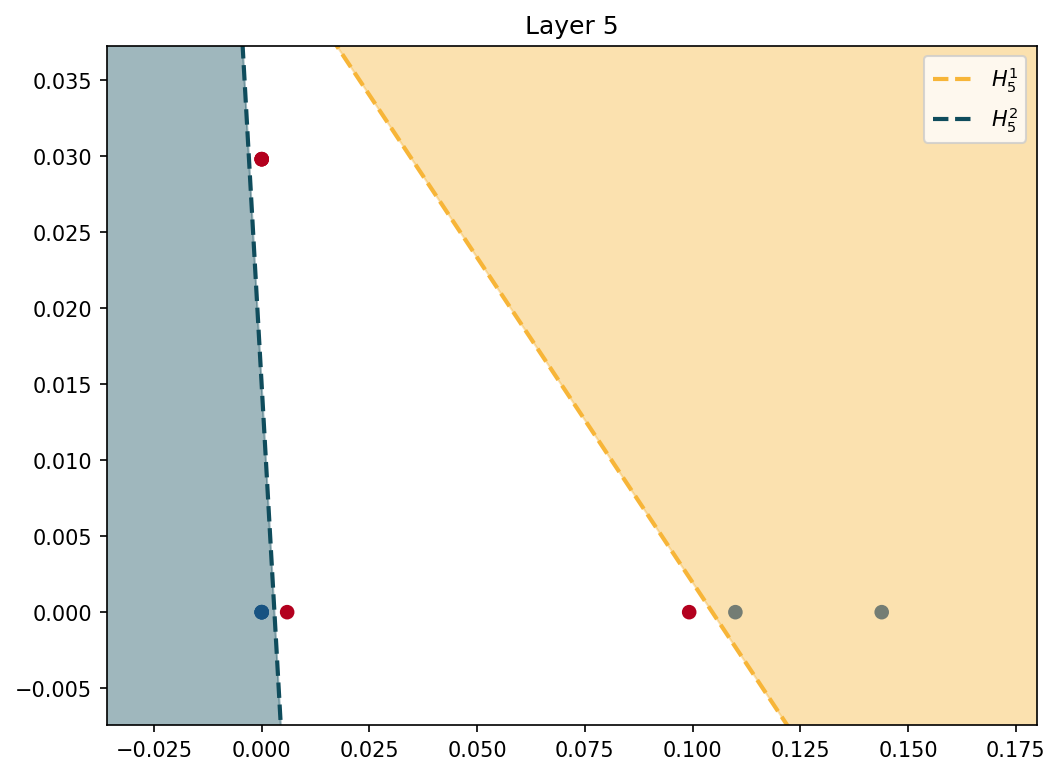

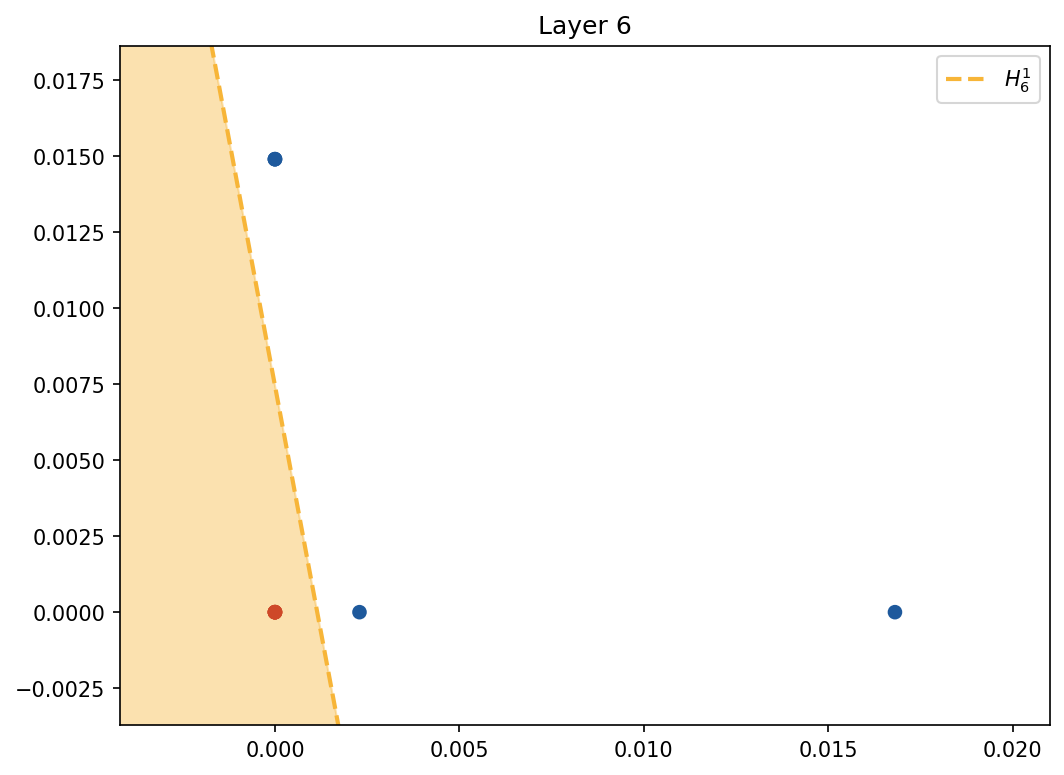

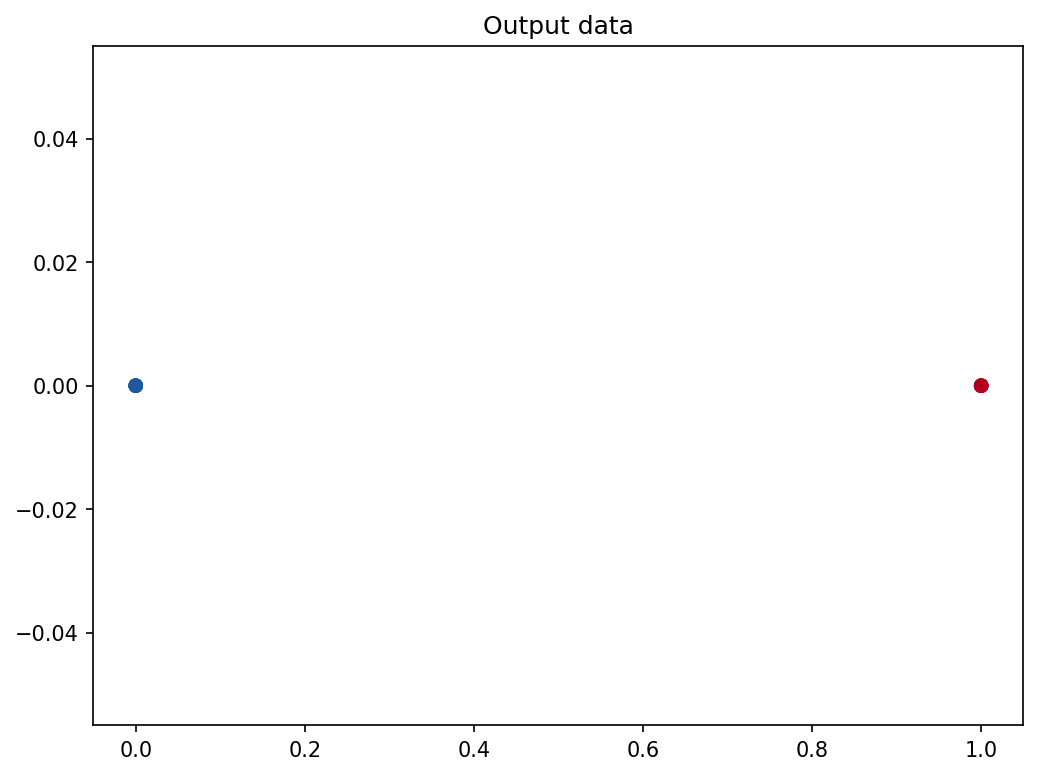

In [4]:
Y_est, W, b, set_groups, Dic = auto_train(X,Y,plot = True, save_images = True, example = example)

**Remark:** In the previews plots, the colored region next to the hyperplane (line) represents the active part of the neural network. The uncolored region corresponds to the area without activation, i.e., the kernel of the neural network. As can be observed, all points in the non-activated region collapse into a single point. The hyperplanes (which define the NN parameters) are chosen such that points of the same color collapse into a single point, thereby reducing the data complexity at each layer.

We define `Y_est` as the NN output

In [5]:
Y_est = feedfoward_NN(X,W,b,set_groups,False)

We check if the NN output are equals to the labels

In [6]:
Y_est == Y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Finally we generate a gif with the "evolution" of the NN, that is, the pposition of the data on each layer.

In [7]:
make_gif(example = 'example_1',duration = 2)

Saved gif


# Example 2

In the following example we apply our algorithm to solve the binary classification problem of the two rings. We consider 100 points.

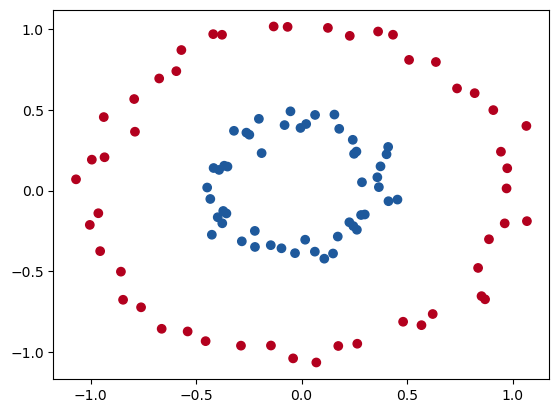

In [10]:
from sklearn.datasets import make_circles
np.random.seed(3)
X, Y = make_circles(n_samples=100, factor=0.4, noise=0.05)
plt.scatter(X[:,0],X[:,1],c=colors[Y])

Now, as in the previews example, we use the function `auto_train` to construct the parameters of the neural network (NN)

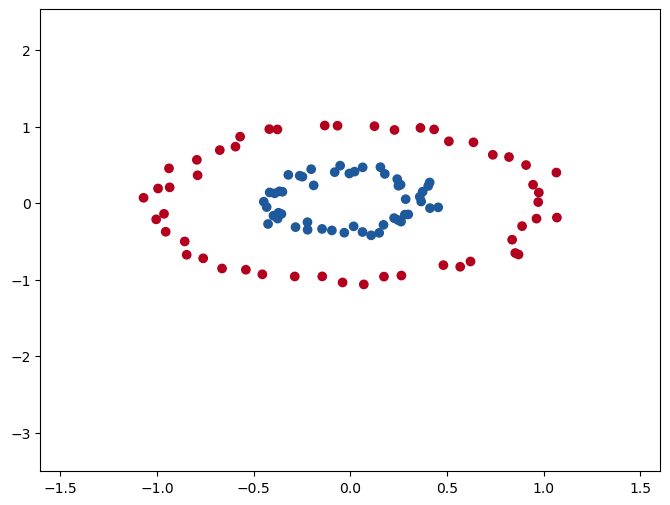

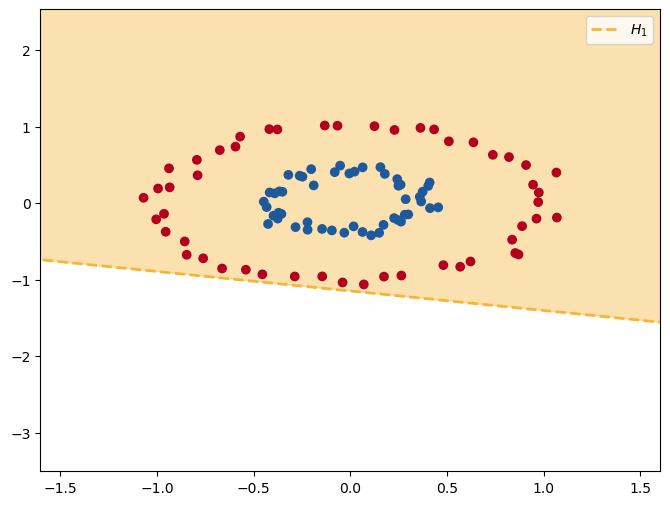

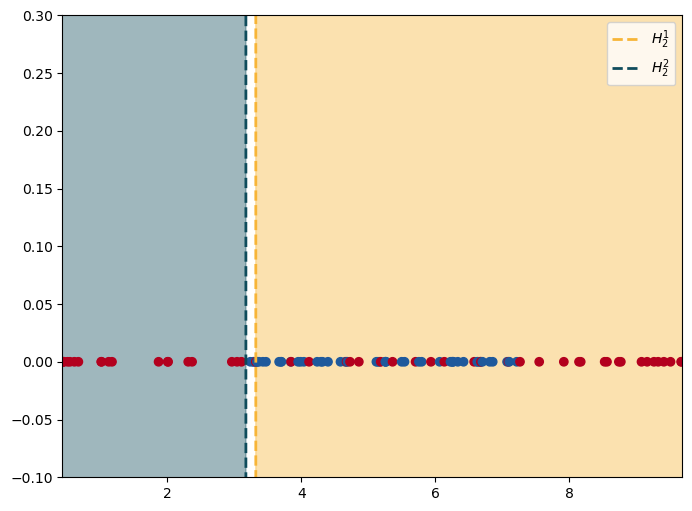

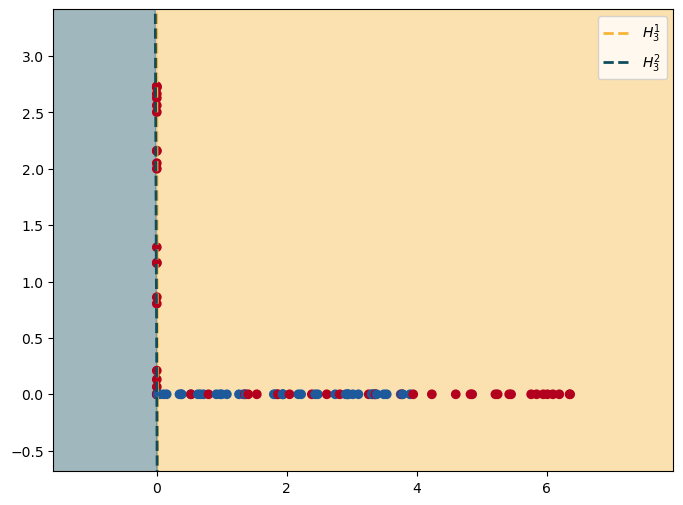

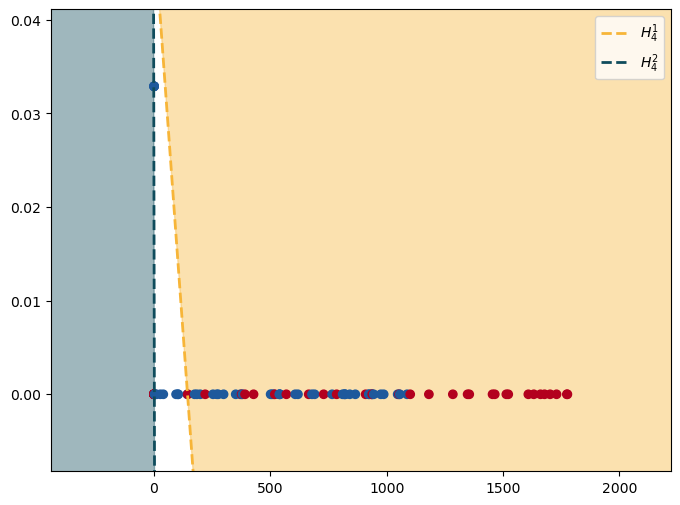

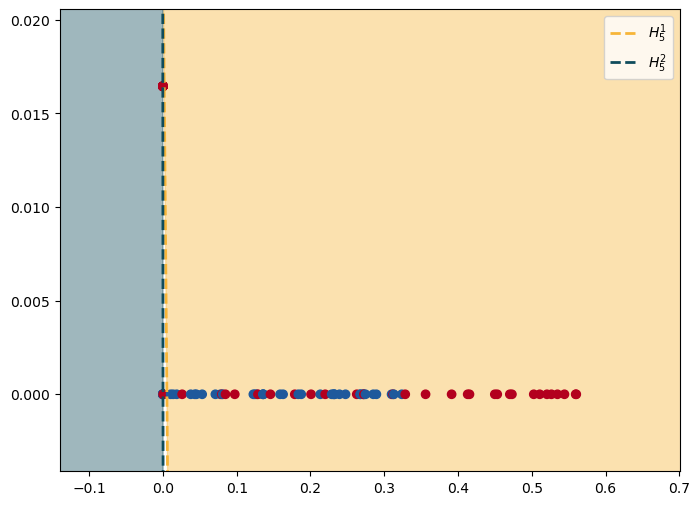

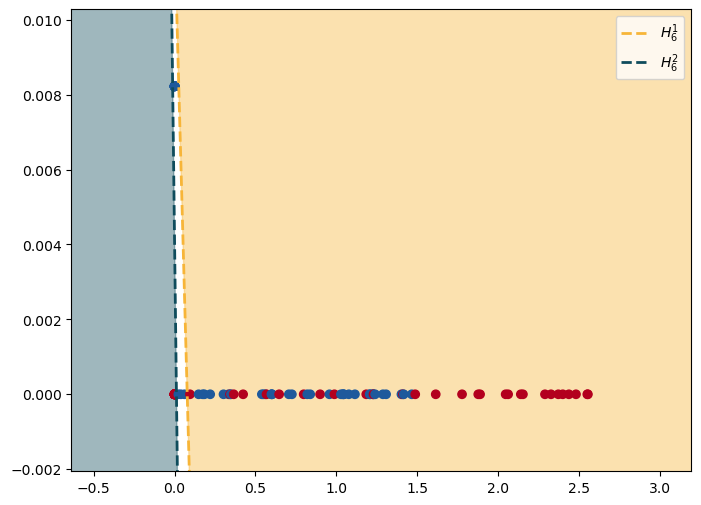

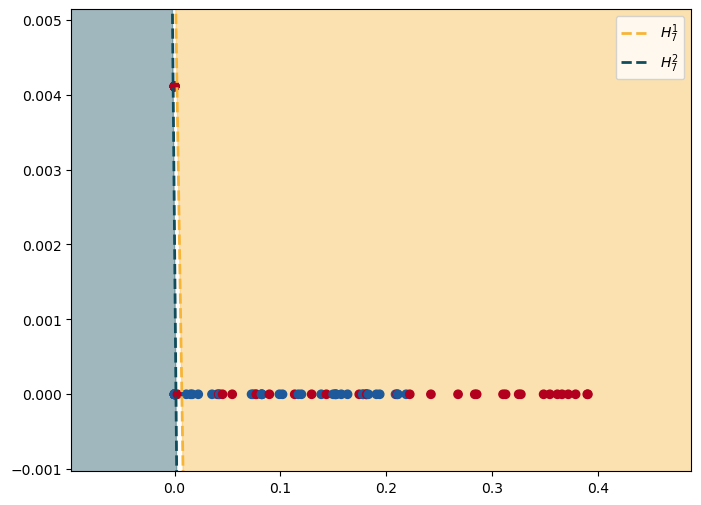

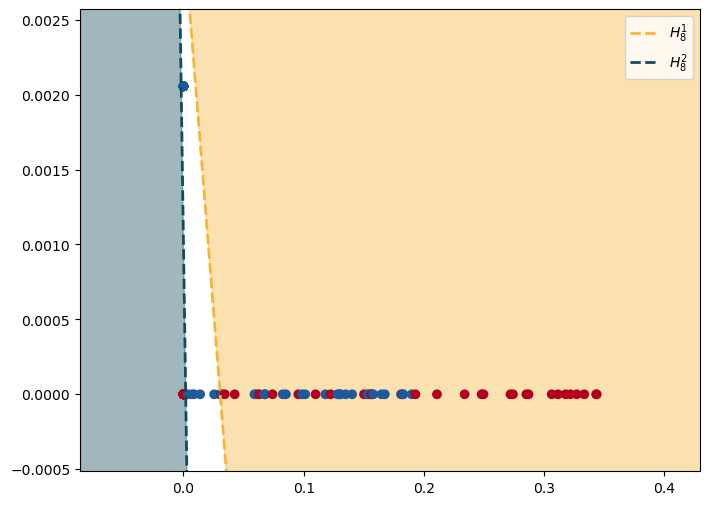

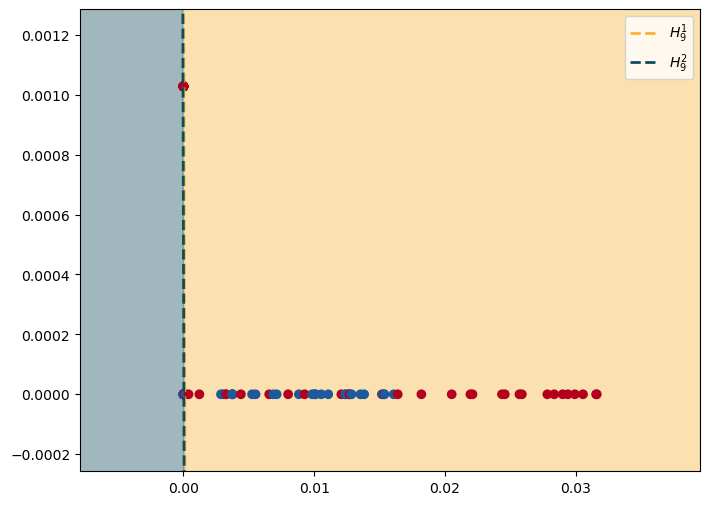

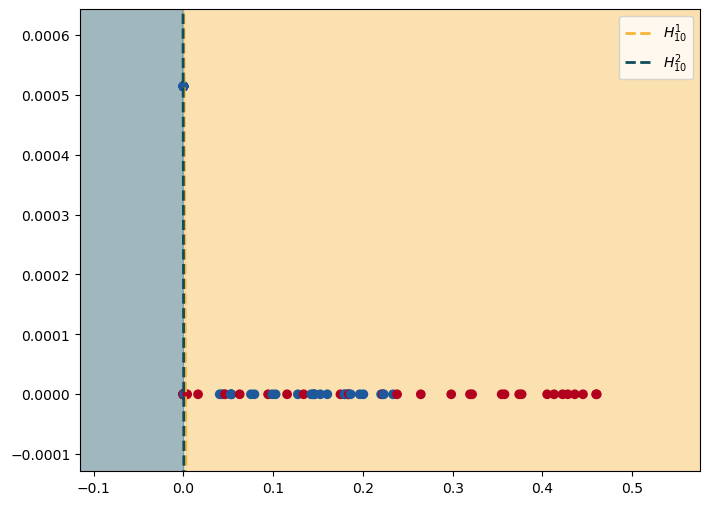

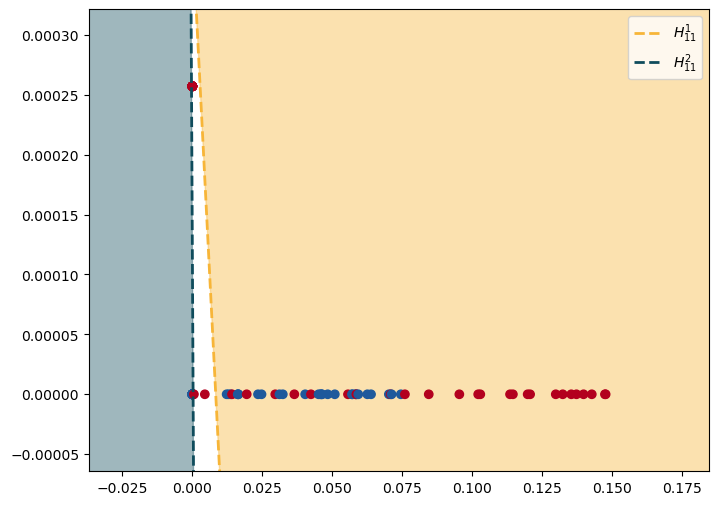

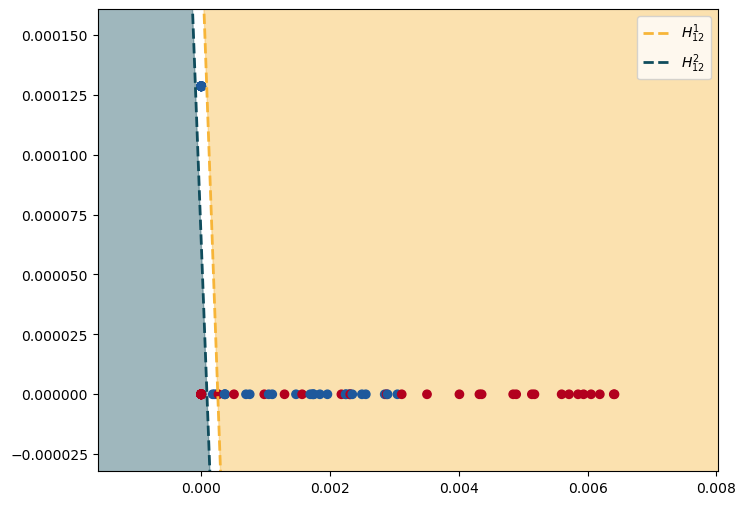

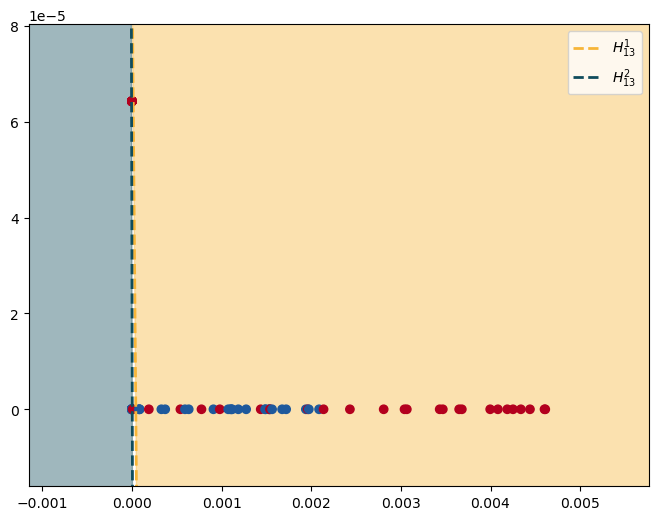

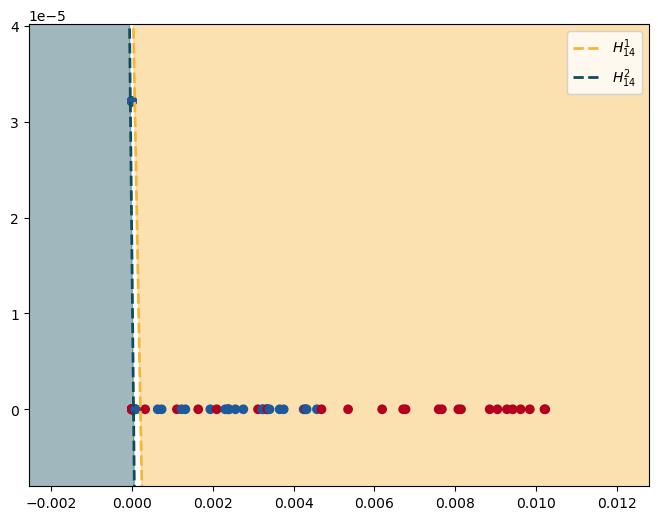

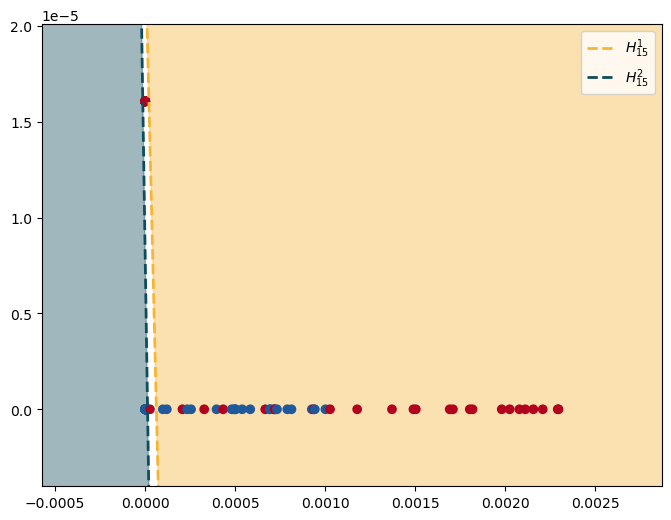

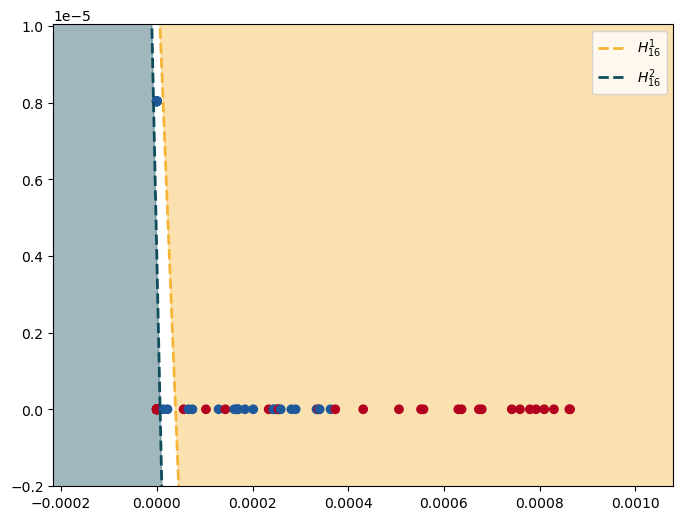

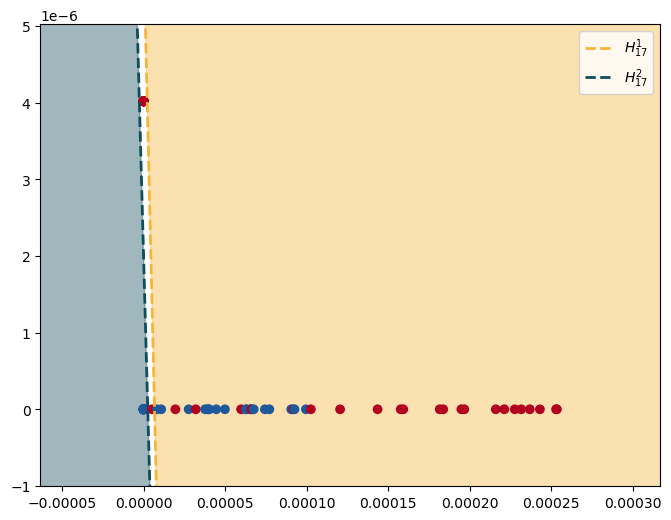

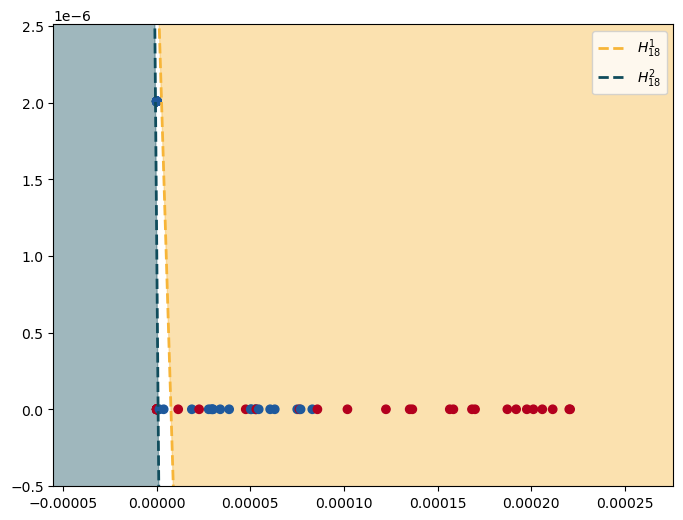

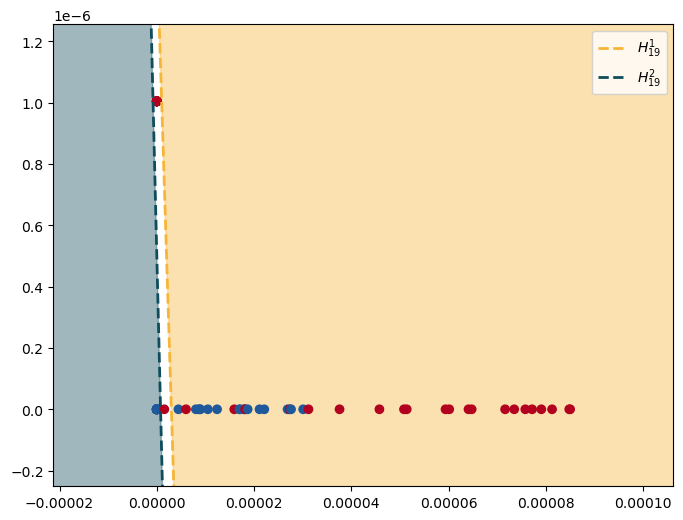

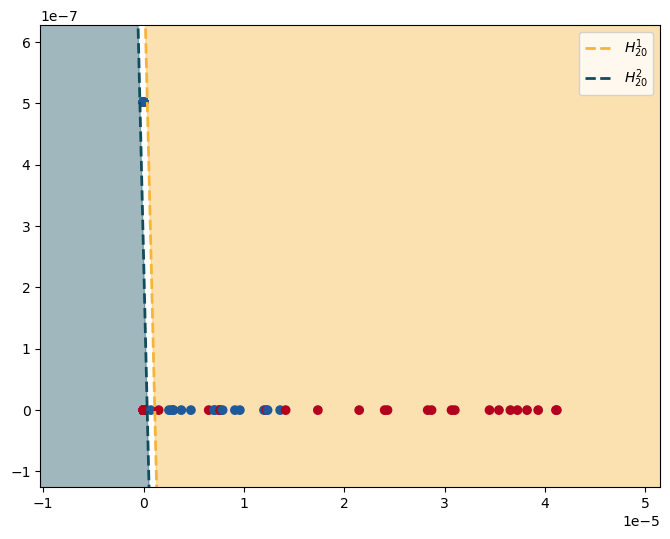

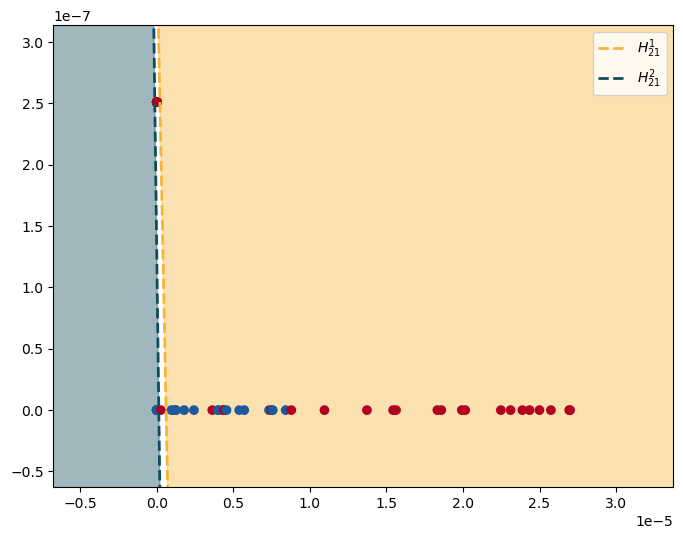

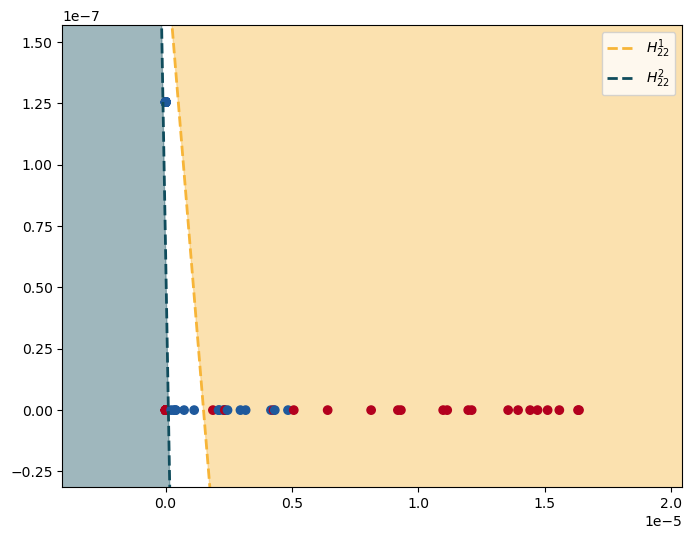

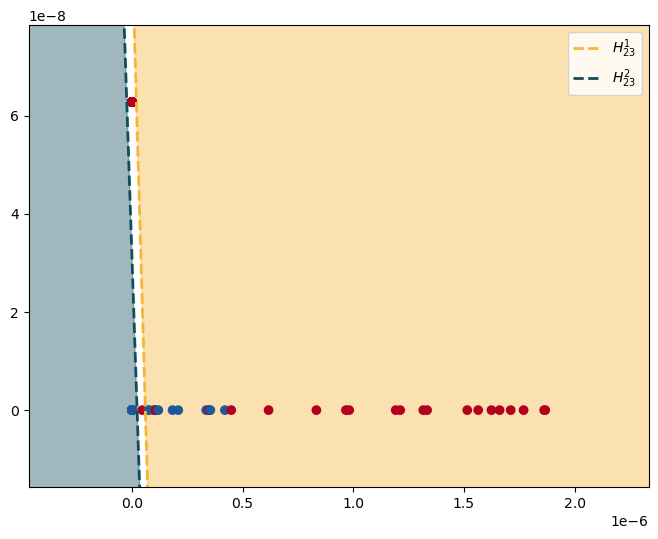

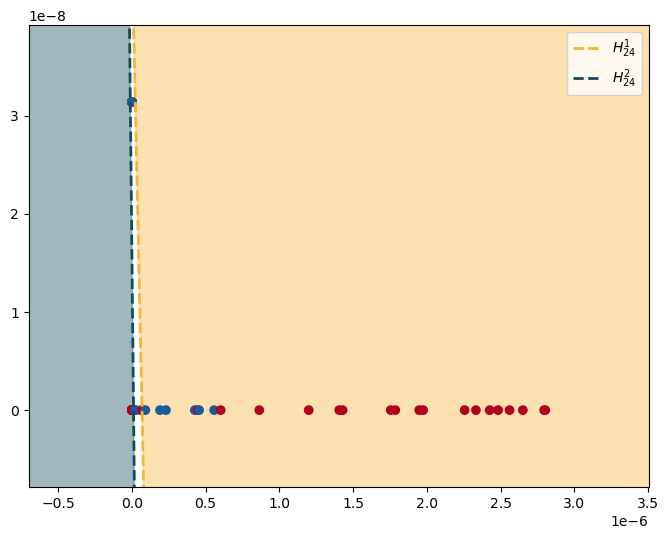

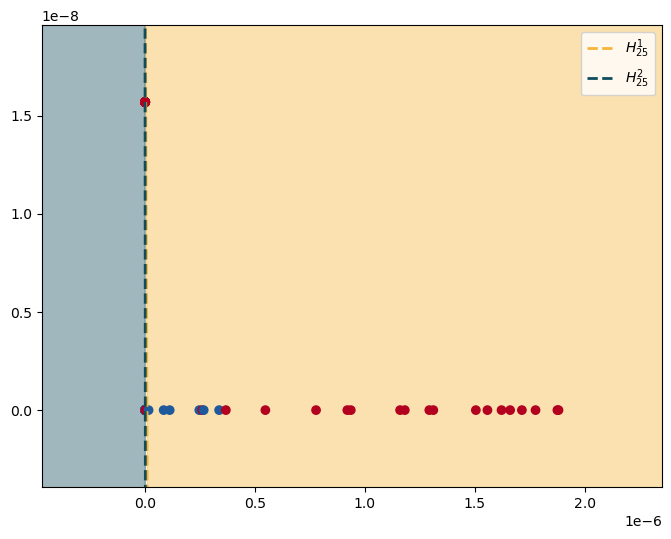

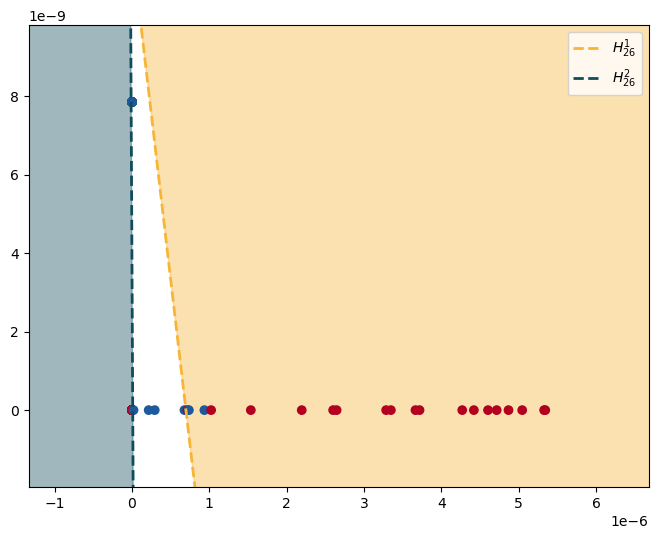

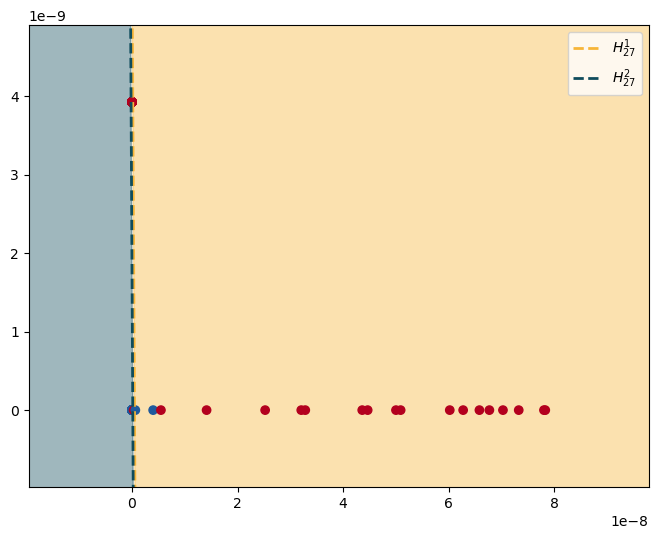

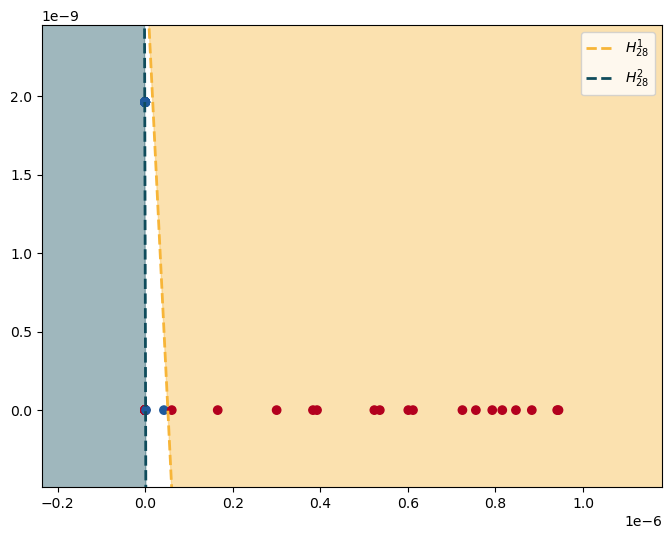

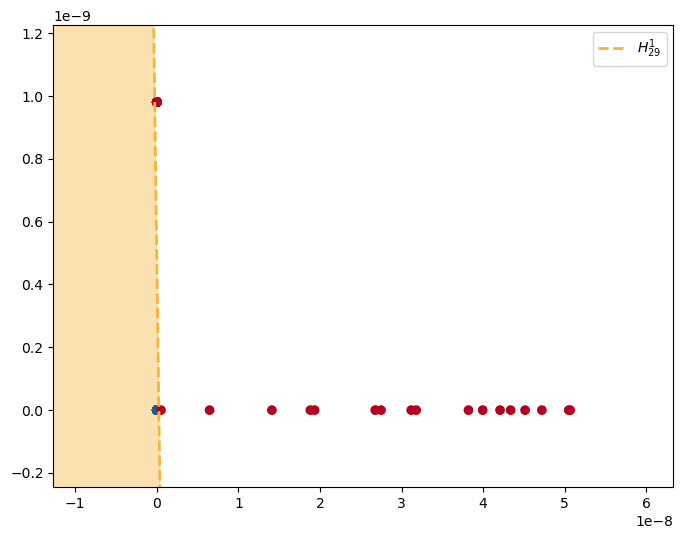

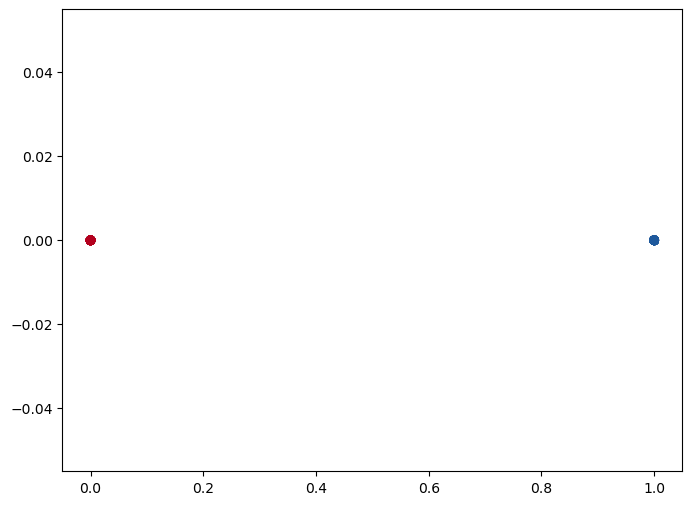

In [11]:
Y_est, W, b, set_groups, Dic = auto_train(X,Y,plot=True)

Here `Y_est` denotes the NN output. To compare with the real labels we define the mass "Y_est==Y" and if all entres coincides "np.prod(Y_est==Y)" should be equals to 1.

In [12]:
np.prod(Y_est==Y)

1

Finally, we plot the data with thw labels predicted by the NN.

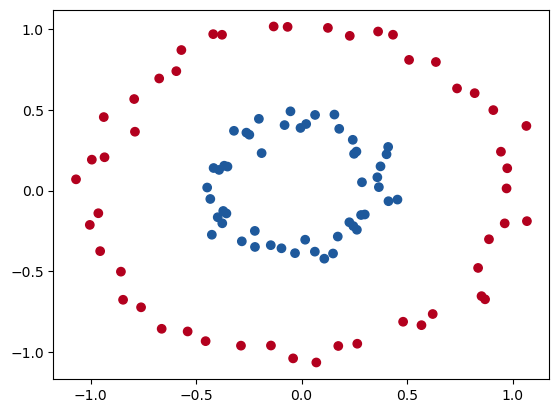

In [13]:
plt.scatter(X[:,0],X[:,1],c=colors[Y_est.astype(int)])